<a href="https://colab.research.google.com/github/Tyton25/Event_Analysis/blob/main/mass_gv_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install us
!pip install geonamescache
!pip install folium

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.4 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12545 sha256=11968aa430cc7e77e0ee10d4b5dd5b5179f87e8944a35c1129370e5df2cf4d1d
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
# import us
import io
import csv
import folium
import requests
import geonamescache
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from csv import DictReader
from tabulate import tabulate

In [ ]:
# states = us.states.STATES
# states

In [ ]:
# states = [s.name for s in us.states.STATES]
# states

In [ ]:
gc = geonamescache.GeonamesCache()
us_states = gc.get_us_states()
us_states.keys()

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [ ]:
state_abbrs = us_states.keys()
states = []
for abbr in state_abbrs:
  states.append(us_states[abbr]['name'])
states

['Alaska',
 'Alabama',
 'Arkansas',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

In [ ]:
state_abbrs = us_states.keys()
states_dict = {}
for abbr in state_abbrs:
  states_dict[abbr] = us_states[abbr]['name']
states_dict

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming

In [ ]:
cities_columns = ['geoname_id', 'name', 'asciiname', 'alternatemanes', 'latitude', 'latitude',
                     'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code',
                     'admin3_code', 'admin4_code', 'population', 'elevation', 'elem', 'timezone', 'modification_date']

In [ ]:
# File downloaded from https://download.geonames.org/export/dump/
# cities_df = pd.read_csv("/content/us_gazeteer.txt", sep="\t", header=None)
# cities_df

In [ ]:
# cities_df.columns = cities_columns
# cities_df

In [ ]:
# cities_df.info()

In [ ]:
# us_cities = cities_df['name'].values
# len(us_cities)

In [ ]:
# cities_list = set(us_cities)

In [ ]:
# len(cities_list)

In [ ]:
# 'Bladensburg' in cities_list

In [ ]:
CSV_URL = 'https://raw.githubusercontent.com/Tyton25/Event_Analysis/main/gv_20231224.csv'
CSV_INPUT_FILE = "/content/sample_data/gv_input.csv"

In [ ]:
download = requests.get(CSV_URL)
with open(CSV_INPUT_FILE, 'w') as f:
  f.write(download.content.decode('utf-8'))

In [ ]:
# Download, read, and transform into a pandas dataframe
download = requests.get(CSV_URL).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0,NaN
1,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0,NaN
2,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0,NaN
3,2784986,"December 22, 2023",New York,Corona (Queens),117-29 143rd St,1,3,0,0,0,NaN
4,2784291,"December 21, 2023",District of Columbia,Washington,1399 Half St SW,2,2,0,0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        647 non-null    int64  
 1   Incident Date      647 non-null    object 
 2   State              647 non-null    object 
 3   City Or County     647 non-null    object 
 4   Address            645 non-null    object 
 5   Victims Killed     647 non-null    int64  
 6   Victims Injured    647 non-null    int64  
 7   Suspects Killed    647 non-null    int64  
 8   Suspects Injured   647 non-null    int64  
 9   Suspects Arrested  647 non-null    int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 55.7+ KB


In [ ]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
count,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000,0.0
mean,2.635383e+06,1.088099,4.108192,0.063369,0.049459,0.593509,NaN
std,7.961610e+04,1.525824,2.662789,0.250083,0.290237,1.010849,NaN
min,2.492314e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.573233e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
50%,2.634357e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN
75%,2.699008e+06,2.000000,5.000000,0.000000,0.000000,1.000000,NaN
max,2.786038e+06,18.000000,32.000000,2.000000,5.000000,7.000000,NaN


In [ ]:
df.drop(columns=['Operations'], inplace=True)
df

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
1,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
2,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
3,2784986,"December 22, 2023",New York,Corona (Queens),117-29 143rd St,1,3,0,0,0
4,2784291,"December 21, 2023",District of Columbia,Washington,1399 Half St SW,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
642,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0
643,2492611,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,0,5,0,0,0
644,2493102,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,0,4,0,0,0
645,2492448,"January 1, 2023",Florida,Ocala,1600 block of SW 5th St,2,4,0,0,1


In [ ]:
# Rename Columns
def reformat_columns(my_columns):
    formatted_columns = []
    for col in my_columns:
        num_sub = col.replace('# ', '')
        new_col = num_sub.replace('-', '_').replace(' ', '_')
        formatted_columns.append(new_col)

    return formatted_columns

In [ ]:
columns = reformat_columns(df.columns)
columns

['Incident_ID',
 'Incident_Date',
 'State',
 'City_Or_County',
 'Address',
 'Victims_Killed',
 'Victims_Injured',
 'Suspects_Killed',
 'Suspects_Injured',
 'Suspects_Arrested']

In [ ]:
df.columns = columns
df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
1,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
2,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
3,2784986,"December 22, 2023",New York,Corona (Queens),117-29 143rd St,1,3,0,0,0
4,2784291,"December 21, 2023",District of Columbia,Washington,1399 Half St SW,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
642,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0
643,2492611,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,0,5,0,0,0
644,2493102,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,0,4,0,0,0
645,2492448,"January 1, 2023",Florida,Ocala,1600 block of SW 5th St,2,4,0,0,1


## Breakdown of Deaths/Injuries

### Totals (USA)

In [ ]:
# Total victims killed
df['Victims_Killed'].sum()

704

In [ ]:
# Total victims indjured
df['Victims_Injured'].sum()

2658

In [ ]:
# Total suspects killed
df['Suspects_Killed'].sum()

41

In [ ]:
# Total suspects arrested
df['Suspects_Arrested'].sum()

384

In [ ]:
deadly_df = df[df['Victims_Killed'] > 0]
deadly_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
1,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
2,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
3,2784986,"December 22, 2023",New York,Corona (Queens),117-29 143rd St,1,3,0,0,0
4,2784291,"December 21, 2023",District of Columbia,Washington,1399 Half St SW,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
638,2495059,"January 4, 2023",Virginia,Dumfries,17900 block of Milroy Dr,1,4,0,0,1
639,2494254,"January 3, 2023",District of Columbia,Washington,6200 block of Georgia Ave NW,1,3,0,0,0
642,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0
645,2492448,"January 1, 2023",Florida,Ocala,1600 block of SW 5th St,2,4,0,0,1


In [ ]:
deadly_df.value_counts('Victims_Killed')

Victims_Killed
1     200
2      73
3      49
4      25
5       6
6       5
7       2
8       1
11      1
18      1
dtype: int64

In [ ]:
deadly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 646
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Incident_ID        363 non-null    int64 
 1   Incident_Date      363 non-null    object
 2   State              363 non-null    object
 3   City_Or_County     363 non-null    object
 4   Address            363 non-null    object
 5   Victims_Killed     363 non-null    int64 
 6   Victims_Injured    363 non-null    int64 
 7   Suspects_Killed    363 non-null    int64 
 8   Suspects_Injured   363 non-null    int64 
 9   Suspects_Arrested  363 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 31.2+ KB


In [ ]:
deadly_df.describe()

,Incident_ID,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
count,3.630000e+02,363.000000,363.000000,363.000000,363.000000,363.000000
mean,2.633311e+06,1.939394,3.449036,0.096419,0.049587,0.661157
std,8.274509e+04,1.580848,3.034701,0.295572,0.241470,1.010063
min,2.492314e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.570706e+06,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.629270e+06,1.000000,3.000000,0.000000,0.000000,0.000000
75%,2.699130e+06,2.000000,4.000000,0.000000,0.000000,1.000000
max,2.786038e+06,18.000000,32.000000,1.000000,2.000000,6.000000


In [ ]:
state_count_df = deadly_df.value_counts('State')
state_count_df

State
Texas                   41
Illinois                32
California              29
North Carolina          20
Pennsylvania            18
Louisiana               17
Florida                 17
Ohio                    16
Tennessee               14
Mississippi             12
Georgia                 11
Maryland                10
Missouri                 9
Indiana                  9
Washington               9
South Carolina           9
Colorado                 9
Michigan                 7
Alabama                  7
Arkansas                 7
New York                 7
New Jersey               6
District of Columbia     6
Oklahoma                 5
Kentucky                 4
Virginia                 4
Minnesota                3
Nevada                   3
Arizona                  3
Massachusetts            3
Wisconsin                3
New Mexico               2
Maine                    2
Nebraska                 1
North Dakota             1
Oregon                   1
Kansas                

In [ ]:
# Create df with state & deaths columns
death_df = pd.DataFrame(state_count_df)
death_df.reset_index(inplace=True)
death_df.columns = ['State', 'Incidents']
death_df

,State,Incidents
0,Texas,41
1,Illinois,32
2,California,29
3,North Carolina,20
4,Pennsylvania,18
5,Louisiana,17
6,Florida,17
7,Ohio,16
8,Tennessee,14
9,Mississippi,12


In [ ]:
# Limit top 15
trunc_death_df = death_df[:15]

<function matplotlib.pyplot.show(close=None, block=None)>

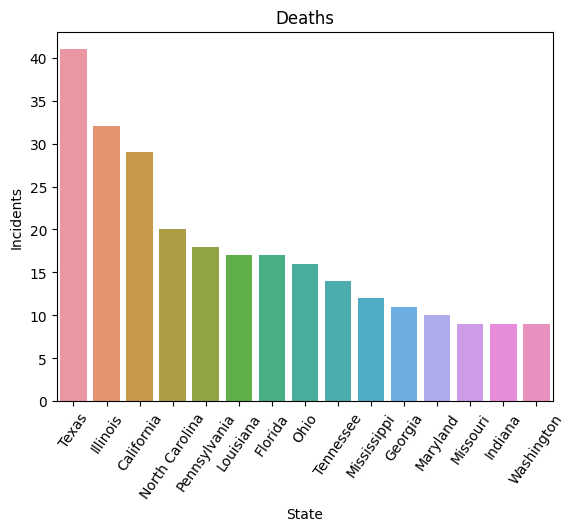

In [152]:
ax = sns.barplot(data = trunc_death_df, x=trunc_death_df.State, y=trunc_death_df.Incidents)
ax.tick_params(axis='x', rotation=55)
ax.set_title('Deaths')
# ax.set_ylabel('deaths', rotation=45)
plt.show

## Suspects at Large

In [ ]:
suspect_at_large_df = df.loc[(df['Suspects_Killed'] == 0) &
                             (df['Suspects_Injured'] == 0) &
                             (df['Suspects_Arrested'] == 0)]

suspect_at_large_df.reset_index(inplace=True, drop=True)

In [ ]:
suspect_at_large_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
1,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
2,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
3,2784986,"December 22, 2023",New York,Corona (Queens),117-29 143rd St,1,3,0,0,0
4,2784291,"December 21, 2023",District of Columbia,Washington,1399 Half St SW,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
366,2494425,"January 3, 2023",Louisiana,New Orleans,2600 block of S. Rocheblave St,0,5,0,0,0
367,2497601,"January 1, 2023",Florida,Miami Gardens,NW 171st St and NW 30th Ave,0,9,0,0,0
368,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0
369,2492611,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,0,5,0,0,0


## Texas

In [ ]:
texas_df = deadly_df[deadly_df['State'] == 'Texas']
texas_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
17,2771255,"December 5, 2023",Texas,Austin,7104 Berkman Dr,6,3,0,0,1
19,2769819,"December 3, 2023",Texas,Dallas,9700 block of Royce Dr,4,1,1,0,0
20,2769728,"December 3, 2023",Texas,Houston,4913 Griggs Rd,1,3,0,0,0
47,2753565,"November 12, 2023",Texas,Pearland,1014 N Main St,1,4,0,0,1
76,2741949,"October 28, 2023",Texas,Texarkana,700 block of N Stateline Ave,3,3,0,0,2
88,2735343,"October 21, 2023",Texas,Borger,718 N Main St,1,3,0,0,1
124,2720311,"October 1, 2023",Texas,Houston,8700 block of Cypressbrook Dr,2,2,0,0,1
130,2715316,"September 25, 2023",Texas,Dallas,4800 block of Elsie Faye Heggins St,1,3,0,0,1
143,2708659,"September 17, 2023",Texas,El Paso,12300 Tierra Inca Dr,2,3,0,1,1


In [ ]:
# Total # of deaths in Texas
texas_df['Victims_Killed'].sum()

80

## Denver

In [ ]:
denver_df = df[df['City_Or_County'] == 'Denver']
denver_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
56,2747734,"November 5, 2023",Colorado,Denver,5514 E 33rd Ave,2,3,0,2,2
102,2729845,"October 14, 2023",Colorado,Denver,12445 E 39th Ave,3,3,0,0,0
147,2708514,"September 16, 2023",Colorado,Denver,1946 Market St,0,5,0,0,1
354,2623809,"June 13, 2023",Colorado,Denver,2000 block of Market St,0,9,0,1,2
434,2594759,"May 10, 2023",Colorado,Denver,9600 E Girard Ave,1,4,0,0,2
627,2498792,"January 9, 2023",Colorado,Denver,18th St and Blake St,0,4,0,0,0


In [ ]:
df[df['State'] == 'Idaho']

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
331,2629211,"June 18, 2023",Idaho,Kellogg,525 W Cameron Ave,4,0,0,0,1


## Incidents by State

In [ ]:
df['City_Or_County'].value_counts()

Chicago                34
Philadelphia           21
Memphis                14
Dallas                 12
Columbus               12
                       ..
Homestead (Munhall)     1
Hampton                 1
Bladensburg             1
Fargo                   1
Ocala                   1
Name: City_Or_County, Length: 335, dtype: int64

In [ ]:
incident_states = df['State'].values
incident_states = set(incident_states)
incident_states

{'Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'South Carolina',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'Wisconsin'}

In [ ]:
states_set = set(states)
states_set

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [ ]:
incient_free_states = states_set - incident_states
incient_free_states

{'Alaska',
 'Montana',
 'Rhode Island',
 'South Dakota',
 'Vermont',
 'West Virginia',
 'Wyoming'}

## Choropleth Visualization

### State Incidents Choropleth

In [ ]:
state_count_df = df['State'].value_counts().reset_index()
state_count_df.columns = ['State', 'Incidents']
state_count_df

,State,Incidents
0,Texas,64
1,Illinois,51
2,California,49
3,Pennsylvania,35
4,Ohio,33
5,North Carolina,32
6,Louisiana,31
7,Florida,29
8,Mississippi,25
9,Georgia,25


In [ ]:
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
geojson = requests.get(geojson_url).json()

In [ ]:
geojson.keys()

dict_keys(['type', 'features'])

In [ ]:
geojson['features'][0]

{'type': 'Feature',
 'id': 'AL',
 'properties': {'name': 'Alabama'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.8

In [ ]:
M = folium.Map(location=[20,10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=state_count_df,
    columns=['State', 'Incidents'],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Incidents"
).add_to(M)

M

### Deaths Rankings

In [153]:
death_df

,State,Incidents
0,Texas,41
1,Illinois,32
2,California,29
3,North Carolina,20
4,Pennsylvania,18
5,Louisiana,17
6,Florida,17
7,Ohio,16
8,Tennessee,14
9,Mississippi,12


In [154]:
M = folium.Map(location=[20,10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=death_df,
    columns=['State', 'Incidents'],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Incidents"
).add_to(M)

M